**Steps:-**

**1) Import all modules from qiskit**

In [1]:
from qiskit import*

**2) Enter the number you want Quantum to guess**

     bin() function is used to convert the number into binary.

Why use bits ?

a) This is because the Quantum Vazirani Algorithm is traditionally used to match classical bits. 

b) With the help of bits it will be easier to design the circuit as you would have to handle 2 states 0 or 1 and not handle multiple  
   digits.

In [2]:
n = int(input("Enter a number:"))
secret_no = str(bin(n))
print(secret_no)

Enter a number: 4567


0b1000111010111



Moving forward you would see that these steps are similar to implementing the traditional Quantum Vazirani Algorithm

**3) Creating the Quantum circuit according to the length of the word and adding one extra qubit to the circuit**

In [3]:
circuit = QuantumCircuit(len(secret_no)+1, len(secret_no))

**4) Creating the general Bernstein-Vazirani circuit**

Adding a H(Hadamard) gate on the second last qubit followed by an X(OR) gate on the last qubit which is followed by a H(Hadamard) gate on the last qubit.

In [4]:
circuit.h(range(len(secret_no)))
circuit.x(len(secret_no))
circuit.h(len(secret_no))

**5) Adding a barrier for clear visualization**`

In [5]:
circuit.barrier()

**6) Building the black(secret) box**

Adding a cx gate means the secret value is a 1 and it goes left to right from down to up

In [6]:
for x, yesno in enumerate(reversed(secret_no)):
    if yesno == '1':
        circuit.cx(x, len(secret_no))
circuit.barrier()

**7) Fourier sampling - basically a reverse hadamard transform**

In [7]:
circuit.h(range(len(secret_no)))

**8) Measuring and seeing the circuit**

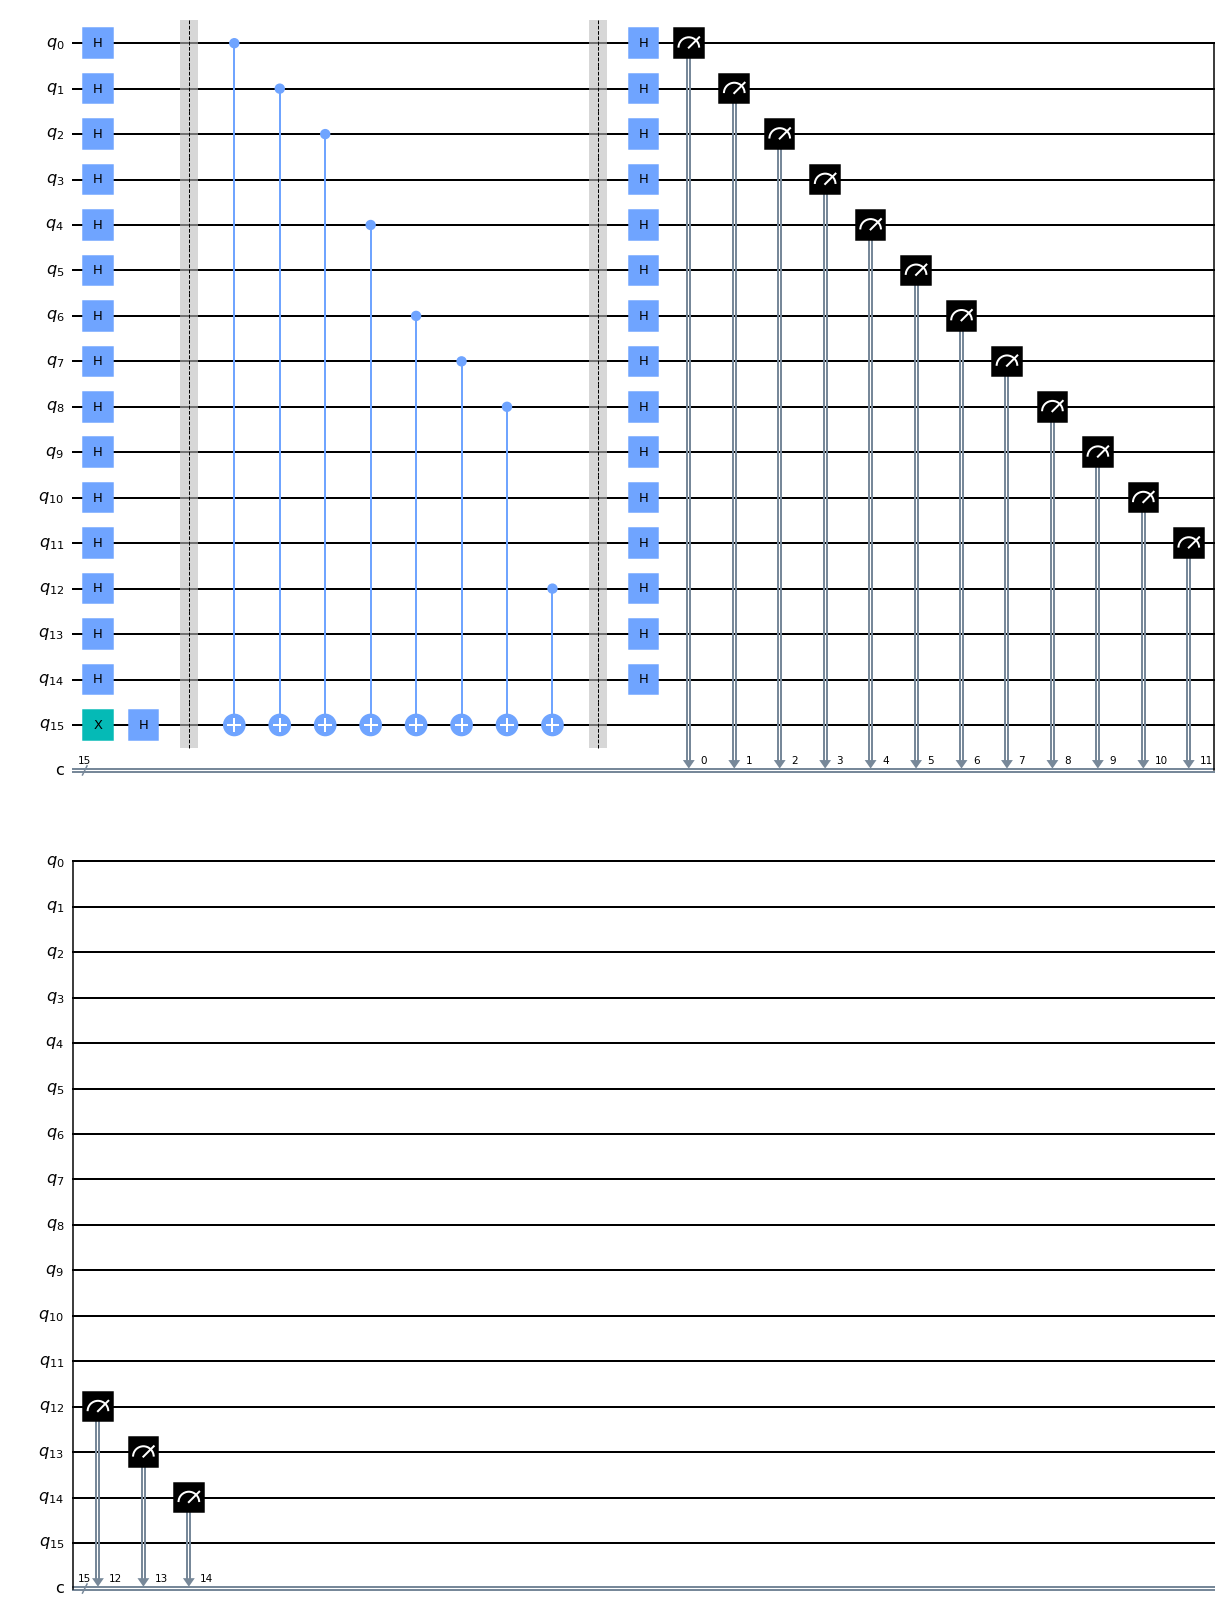

In [8]:
circuit.measure(range(len(secret_no)),range(len(secret_no)))

circuit.draw(output='mpl')

**9) Running the circuit using qasm-simulator**

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()

**10) Converting the results found in counts into binary format**

In [10]:
binval = 0
for num in counts:
    if num == '0' or '1':
        binval = num

**11) Converting the binary number into a decimal number**

In [11]:
intval = 0 
for x, yesno in enumerate(reversed(binval)):
    if yesno == '1':
        intval += 2 ** x
print(intval)

4567
